In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from collections import defaultdict 
from matplotlib.pyplot import figure 

In [2]:
LOG_DIRS = ["../final_logs_2"] 

INITIAL_CUT = 10   
CUT = 1296 
SMOOTH = 25 

In [3]:
def save_averaged_curves(name="self_reward", save=False): 
    logs = [] 
    [logs.extend(glob.glob(os.path.join(log_dir, "*/**/"+name+".npy"), recursive=True)) for log_dir in LOG_DIRS] 
#     print(logs) 

    exps = set() 
#     [exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
#     [exps.add("--".join(l.split("/")[-2].split("--")[:-1])) for l in logs] 
    [exps.add(l.split("/")[2]) for l in logs] 
    print("Exps\n", exps) 

    vals = [] 
    for e in exps: 
        print("exp:", e) 
        vals = [] 
        for l in logs: 
            if e in l: 
                x = np.load(l) 
#                 if (x.shape[0]>=CUT): 
                vals.append(x[INITIAL_CUT:CUT]) 
        vals = np.array(vals)
        r_mean = np.mean(vals, axis=0)
        r_std = np.std(vals, axis=0)/np.sqrt(20) 
        print(r_mean.shape) 
        if save: 
            if not os.path.exists("../final_curves/"+e):
                os.makedirs("../final_curves/"+e) 
            with open('../final_curves/'+e+"/"+ name.split("/")[-1]+"_mean.npy", 'wb') as f:
                np.save(f, r_mean) 
            with open('../final_curves/'+e+"/"+ name.split("/")[-1]+"_std.npy", 'wb') as f:
                np.save(f, r_std) 
# save_averaged_curves(name="rewards/cp/size_avg", save=False) 
for stat in ["size_avg", "coverage_avg", "model_acc", "model_loss", "top1_avg", "top5_avg"]: 
    save_averaged_curves(name="rewards/cp/"+stat, save=False ) 


Exps
 {'cp-padding'}
exp: cp-padding
(1286,)
Exps
 {'cp-padding'}
exp: cp-padding
(1286,)
Exps
 {'cp-padding'}
exp: cp-padding
(1286,)
Exps
 {'cp-padding'}
exp: cp-padding
(1286,)
Exps
 {'cp-padding'}
exp: cp-padding
(1286,)
Exps
 {'cp-padding'}
exp: cp-padding
(1286,)


In [4]:
def running_mean(X, N=SMOOTH):
    cumsum = np.cumsum(np.insert(X, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N) 

{'cp-padding'}


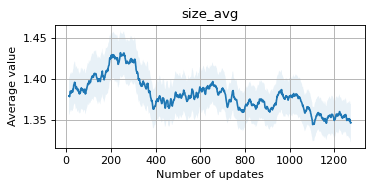

{'cp-padding'}


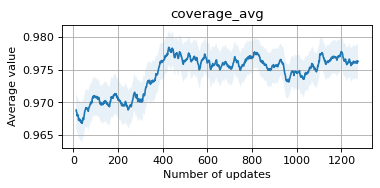

{'cp-padding'}


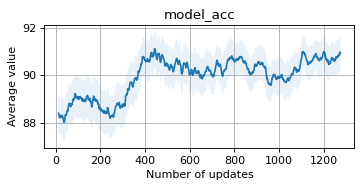

{'cp-padding'}


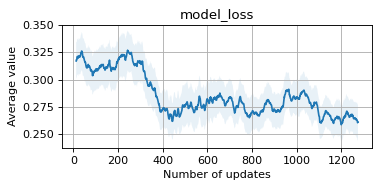

{'cp-padding'}


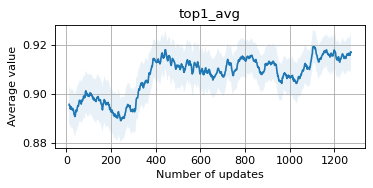

{'cp-padding'}


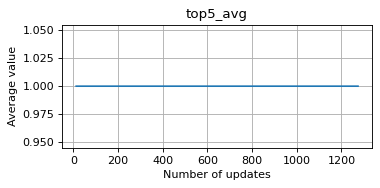

In [5]:
def plot_final(logs="../final_curves", stat="size_avg"): 
    mean_logs = glob.glob(os.path.join(logs, "*/**/"+stat+"_mean.npy"), recursive=True) 
    std_logs = glob.glob(os.path.join(logs, "*/**/"+stat+"_std.npy"), recursive=True) 
        
    exps = set() 
    [exps.add(l.split("/")[-2]) for l in mean_logs] 
    print(exps) 
    
    figure(figsize=(5, 2), dpi=80) 

    for exp in exps: 
        r_mean = np.load([l for l in mean_logs if exp in l][-1])[INITIAL_CUT:CUT]
        r_std = np.load([l for l in std_logs if exp in l][-1])[INITIAL_CUT:CUT]
        x = np.arange(len(r_mean))+1 
        plt.plot(running_mean(x), running_mean(r_mean), label=exp) 
        plt.fill_between(running_mean(x), running_mean(r_mean+r_std), running_mean(r_mean-r_std), alpha=0.1) 
    plt.title(stat) 
    plt.xlabel("Number of updates")
    plt.ylabel("Average value")
#     plt.xlim((10, CUT)) 
#     plt.ylim((-34, -18)) 
    plt.grid()
#     plt.legend() 
    plt.show() 
    plt.close() 
for stat in ["size_avg", "coverage_avg", "model_acc", "model_loss", "top1_avg", "top5_avg"]: 
    plot_final(stat=stat) 
    